In [3]:
from ppca_standard import PPCA
import numpy as np
import matplotlib.pyplot as plt
import pandas

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Example Implementation of PPCA

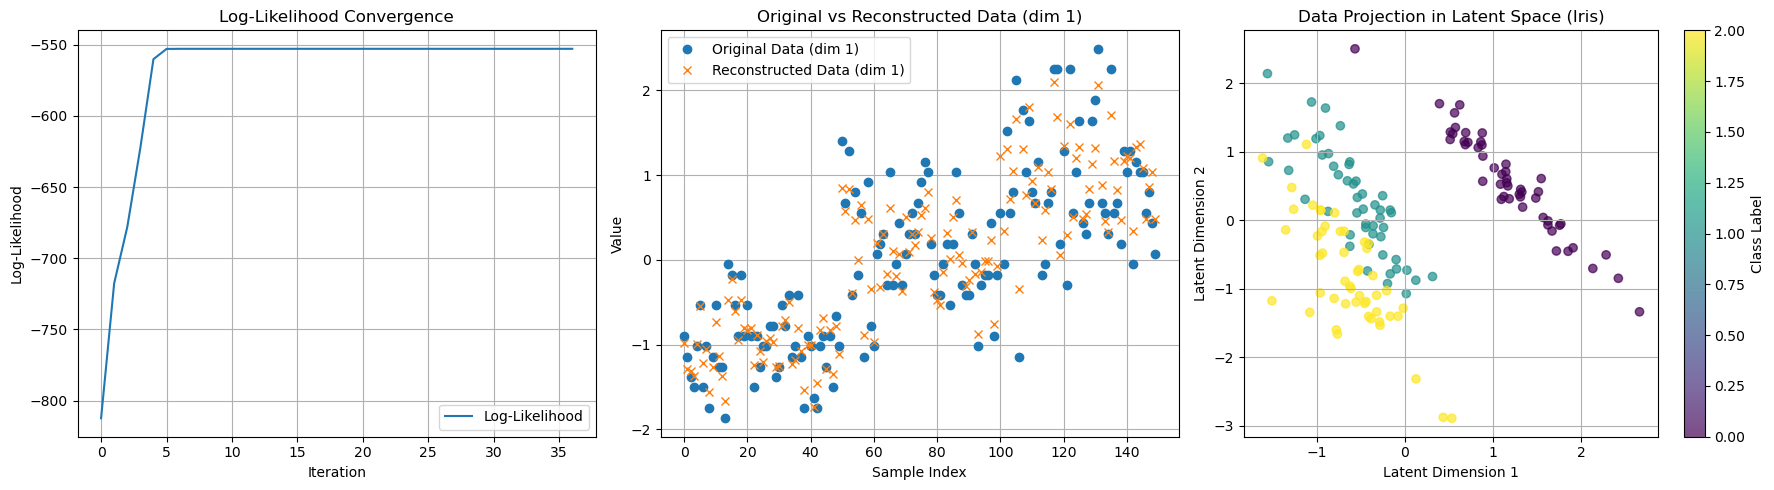

In [4]:
# Load Iris dataset
iris = datasets.load_iris()
iris_data = iris.data.T  # Transpose to shape (d, N)
iris_labels = iris.target  # Class labels

# Preprocess: Center the data
scaler = StandardScaler()
t_centered = scaler.fit_transform(iris_data.T).T  # Center the data (mean=0)

# Fit the PPCA model
d = t_centered.shape[0]  # Number of features (d)
q = 2  # Latent space dimensionality (set to 2 for visualization)

ppca = PPCA(d, q)  # Initialize PPCA with the correct dimensions
ppca.fit(t_centered, max_iter=100)  # Fit the model

# Transform data into the latent space (z)
z_proj = ppca.transform(t_centered)

# Predict/reconstruct the data
t_pred = ppca.predict(t_centered)

# Creating a figure with 1 row and 3 columns for side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plotting log-likelihood over iterations
axes[0].plot(ppca.log_likelihoods, label="Log-Likelihood")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Log-Likelihood")
axes[0].set_title("Log-Likelihood Convergence")
axes[0].legend()
axes[0].grid(True)
# Plotting original data and reconstruction for the first dimension as an example
axes[1].plot(t_centered[0, :], 'o', label="Original Data (dim 1)")
axes[1].plot(t_pred[0, :], 'x', label="Reconstructed Data (dim 1)")
axes[1].set_xlabel("Sample Index")
axes[1].set_ylabel("Value")
axes[1].set_title("Original vs Reconstructed Data (dim 1)")
axes[1].legend()
axes[1].grid(True)

# Latent space visualization (colored by class labels)
scatter = axes[2].scatter(z_proj[0, :], z_proj[1, :], c=iris_labels, alpha=0.7)
axes[2].set_xlabel("Latent Dimension 1")
axes[2].set_ylabel("Latent Dimension 2")
axes[2].set_title("Data Projection in Latent Space (Iris)")
fig.colorbar(scatter, ax=axes[2], label="Class Label")
axes[2].grid(True)

# Show the plots
plt.tight_layout()
plt.show()

### PPCA vs PCA

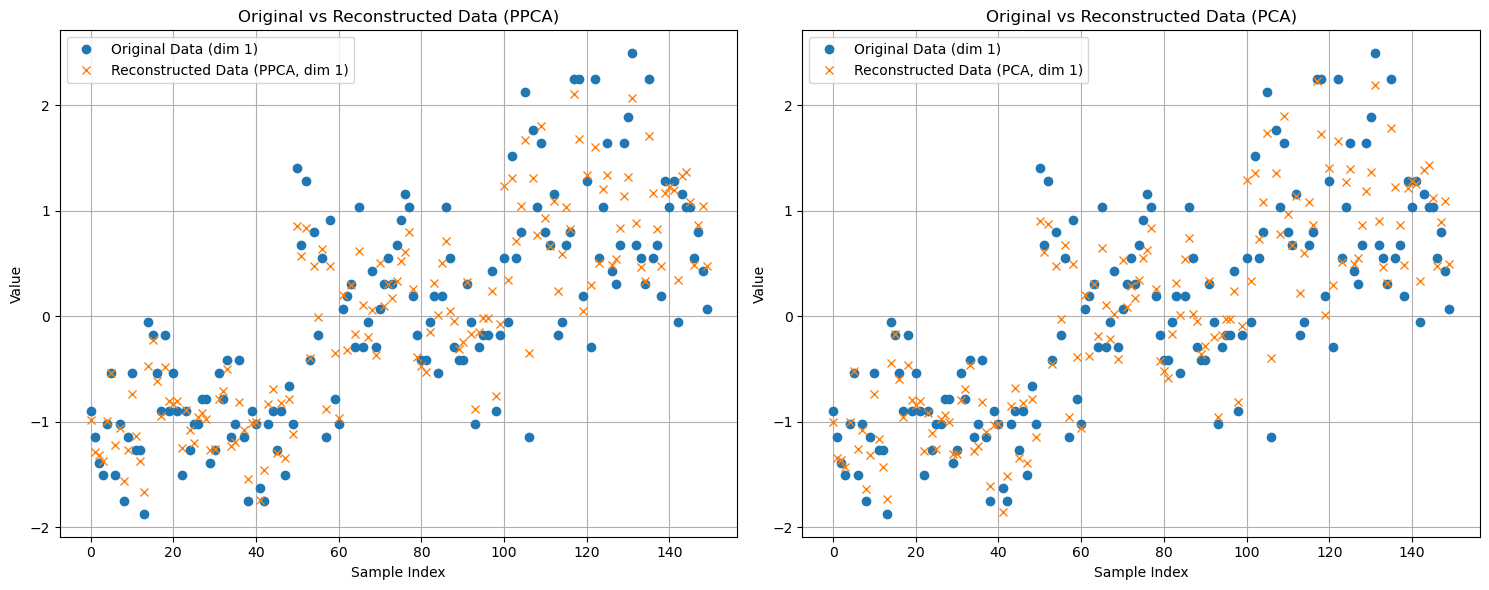

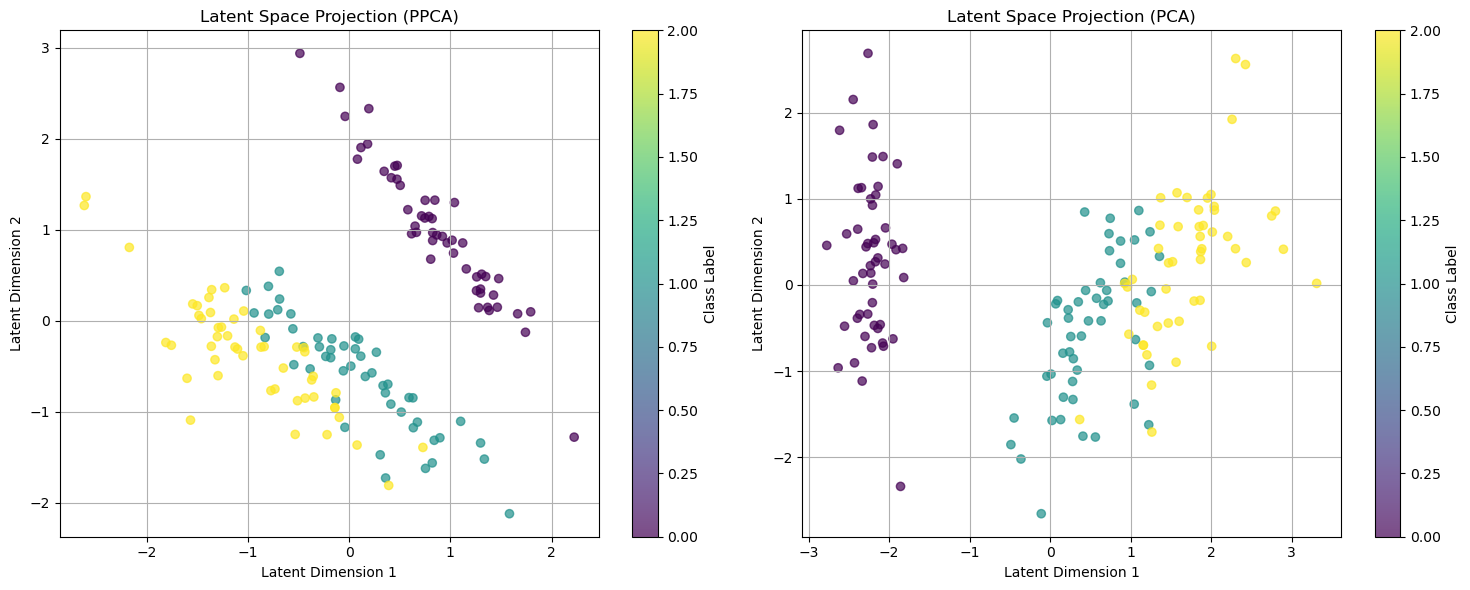

In [5]:
# Load Iris dataset
iris = datasets.load_iris()
iris_data = iris.data.T  # Transpose to shape (d, N)
iris_labels = iris.target  # Class labels

# Preprocess: Center the data
scaler = StandardScaler()
t_centered = scaler.fit_transform(iris_data.T).T

# ------ Fit PPCA Model ------ #

d = t_centered.shape[0]  # Number of features (d)
q = 2  # Latent space dimensionality (set to 2 for visualization)

ppca = PPCA(d, q)  # Initialize PPCA with the correct dimensions
ppca.fit(t_centered, max_iter=100)  # Fit the model

# Transform data into the latent space (z)
z_ppca = ppca.transform(t_centered)
# Predict/reconstruct the data
t_pred_ppca = ppca.predict(t_centered)

# ------ PCA implementation ------ #

pca = PCA(n_components=2)
pca.fit(t_centered.T)

# Project data into the latent space
z_pca = pca.transform(t_centered.T)

# Reconstruct the data
t_pred_pca = pca.inverse_transform(z_pca)
# ------ Plotting Comparison ------ #
# Plotting Original vs Reconstructed Data for PPCA and PCA
plt.figure(figsize=(15, 6))

# PPCA Reconstruction
plt.subplot(1, 2, 1)
plt.plot(t_centered[0, :], 'o', label="Original Data (dim 1)")
plt.plot(t_pred_ppca[0, :], 'x', label="Reconstructed Data (PPCA, dim 1)")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("Original vs Reconstructed Data (PPCA)")
plt.legend()
plt.grid(True)

# PCA Reconstruction
plt.subplot(1, 2, 2)
plt.plot(t_centered[0, :], 'o', label="Original Data (dim 1)")
plt.plot(t_pred_pca[:, 0], 'x', label="Reconstructed Data (PCA, dim 1)")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("Original vs Reconstructed Data (PCA)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting Projection to Latent Space for PPCA and PCA
plt.figure(figsize=(15, 6))
# PPCA Latent Space
plt.subplot(1, 2, 1)
plt.scatter(z_ppca[0, :], z_ppca[1, :], alpha=0.7, c=iris_labels)
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.title("Latent Space Projection (PPCA)")
plt.colorbar(label="Class Label")
plt.grid(True)

# PCA Latent Space
plt.subplot(1, 2, 2)
plt.scatter(z_pca[:, 0], z_pca[:, 1], alpha=0.7, c=iris_labels)
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.title("Latent Space Projection (PCA)")
plt.colorbar(label="Class Label")
plt.grid(True)

plt.tight_layout()
plt.show()